# Spotify Data Analysis Project

This is the introduction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [2]:
print (pd)

<module 'pandas' from 'C:\\Users\\saipr\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>


In [3]:
df = pd.read_csv('dataset.csv')
top_2000 = pd.read_csv('Spotify-2000.csv')

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
top_2000.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [6]:
pd.isnull(df).sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

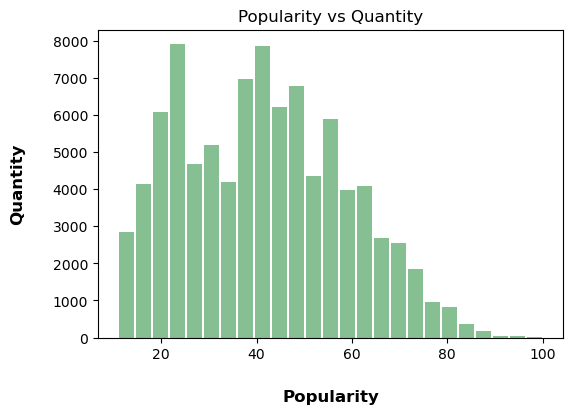

In [20]:
# Too many of certain values 
df = df.query('popularity>10', inplace = False)

ax = df.hist(column='popularity', bins=25, grid=False, figsize=(6,4), color='#86bf91', zorder=2, rwidth=0.9)
temp = ax[0]

for x in temp:
    x.set_title("Popularity vs Quantity")
    x.set_xlabel("Popularity", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Quantity", labelpad=20, weight='bold', size=12)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


Since there is a disparity in popularity amounts, we can clean the data so that only max 200 of each popularity score exist

In [10]:
sorted_df = df.sort_values('popularity', ascending = False)

'''
for popularity_score in sorted_df['popularity'].unique():
    # Select indices of data points with the current popularity score
    indices_to_remove = sorted_df[sorted_df['popularity'] == popularity_score].index[200:]
    # Drop the points beyond the first 200 for each popularity score
    sorted_df.drop(indices_to_remove, inplace=True)
    
sorted_df.head()

# make a frequency array of popularity of each one, if it exceeds drop
zeroes_list = np.zeros(100)

for x in range(df.size): #iterate through everything
    num = zeroes_list[]

sorted_df.head()
'''

"\nfor popularity_score in sorted_df['popularity'].unique():\n    # Select indices of data points with the current popularity score\n    indices_to_remove = sorted_df[sorted_df['popularity'] == popularity_score].index[200:]\n    # Drop the points beyond the first 200 for each popularity score\n    sorted_df.drop(indices_to_remove, inplace=True)\n    \nsorted_df.head()\n\n# make a frequency array of popularity of each one, if it exceeds drop\nzeroes_list = np.zeros(100)\n\nfor x in range(df.size): #iterate through everything\n    num = zeroes_list[]\n\nsorted_df.head()\n"

In [11]:
most_popular = sorted_df.query('popularity>90', inplace = False)

In [12]:
# Integer division
df["duration"] = df["duration_ms"].apply(lambda x: (x//1000))
df.drop("duration_ms", inplace=True, axis=1)


In [13]:
df.insert(6,'duration', df.pop('duration'))
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [14]:
corr_df = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre','explicit'])
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   popularity        114000 non-null  int64  
 2   duration          114000 non-null  int64  
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 13.0 MB


In [15]:
corr_df.dtypes

Unnamed: 0            int64
popularity            int64
duration              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

<Axes: >

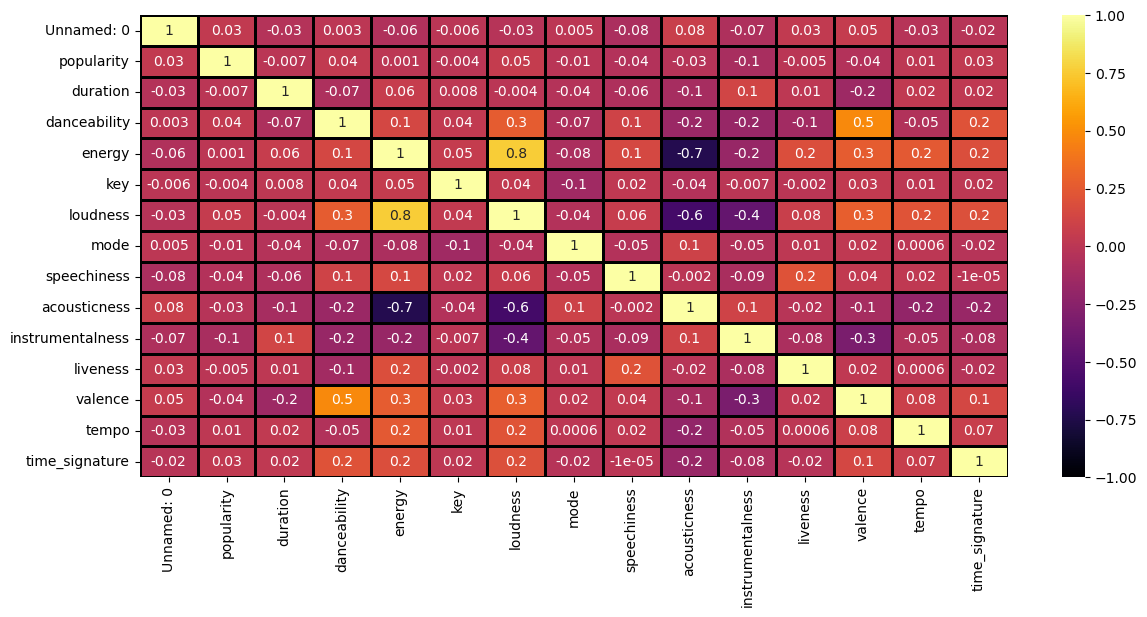

In [21]:
'''
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor="Black")
plt.show()
'''
plt.figure(figsize=(14,6))
sns.heatmap(corr_df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor="Black")

In [40]:
top_2000.dtypes
truncated = top_2000.drop(columns=['Title', 'Artist', 'Top Genre','Index'])

truncated2 = truncated.query('Popularity>60', inplace = False)
truncated2 = truncated2.query('Year>2017', inplace = False)

<Axes: >

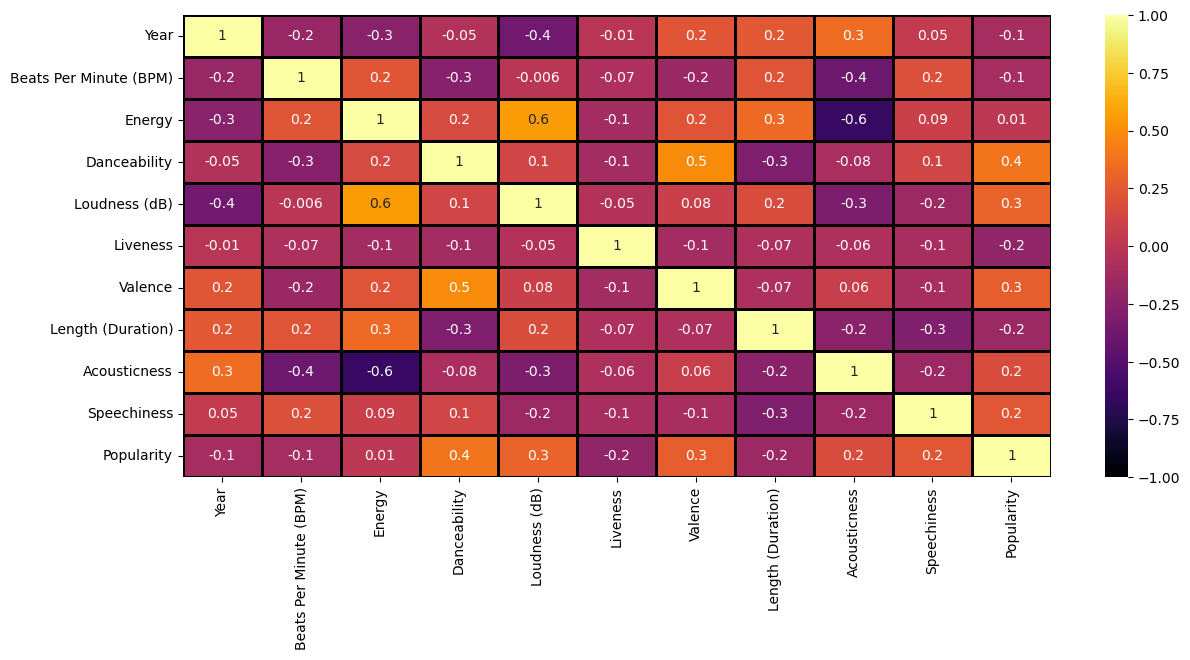

In [41]:
plt.figure(figsize=(14,6))
sns.heatmap(truncated2.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor="Black")

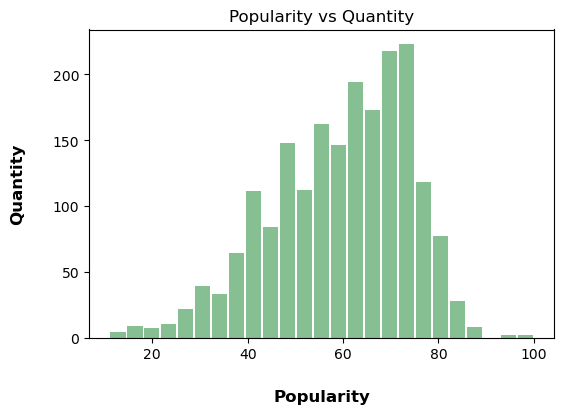

In [19]:
ax = top_2000.hist(column='Popularity', bins=25, grid=False, figsize=(6,4), color='#86bf91', zorder=2, rwidth=0.9)
temp = ax[0]

for x in temp:
    x.set_title("Popularity vs Quantity")
    x.set_xlabel("Popularity", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Quantity", labelpad=20, weight='bold', size=12)

In [25]:
sample_df = df.sample(int(0.01*len(df)))

In [26]:
print(len(sample_df))

905


<Axes: xlabel='Loudness (dB)', ylabel='Popularity'>

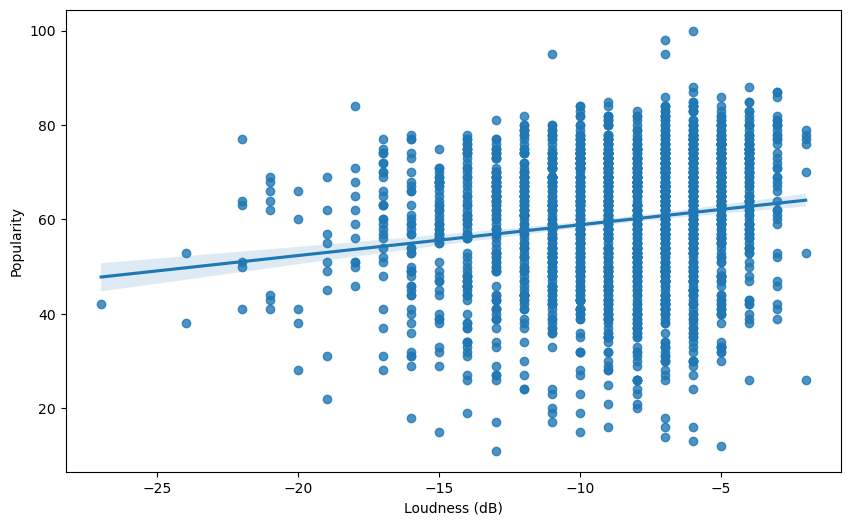

In [29]:
plt.figure(figsize=(10,6))
sns.regplot(data=truncated, y="Popularity", x="Loudness (dB)")

<Axes: xlabel='Loudness (dB)', ylabel='Energy'>

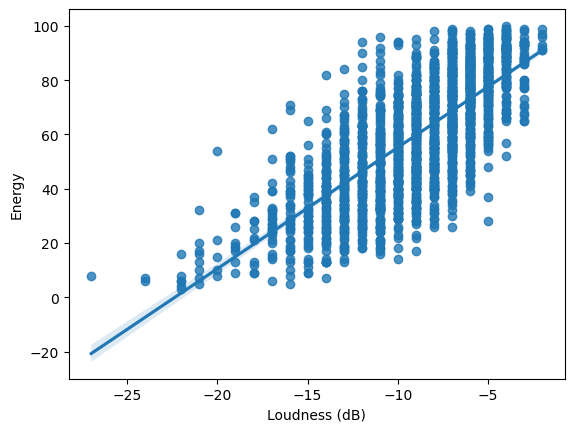

In [37]:
sns.regplot(data=truncated, y="Energy", x="Loudness (dB)")